In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

/storage/ducpm/lung-segmentation


In [3]:
import os

import numpy as np
import matplotlib.pyplot as plt

from src.data import PlethoraDataset, Covid19Dataset

In [20]:
plethora_ds = PlethoraDataset(metadata_path="data/processed/plethora_metadata.csv")
covid_ds = Covid19Dataset(ct_dir="data/raw/COVID-19-CT-Seg_20cases/ct_scans/", 
                          mask_dir="data/raw/COVID-19-CT-Seg_20cases/lung_masks/")

In [33]:
ptr_sample = plethora_ds[50]
covid_sample = covid_ds[3120]

ptr_img = ptr_sample['img']
covid_img = covid_sample['img']

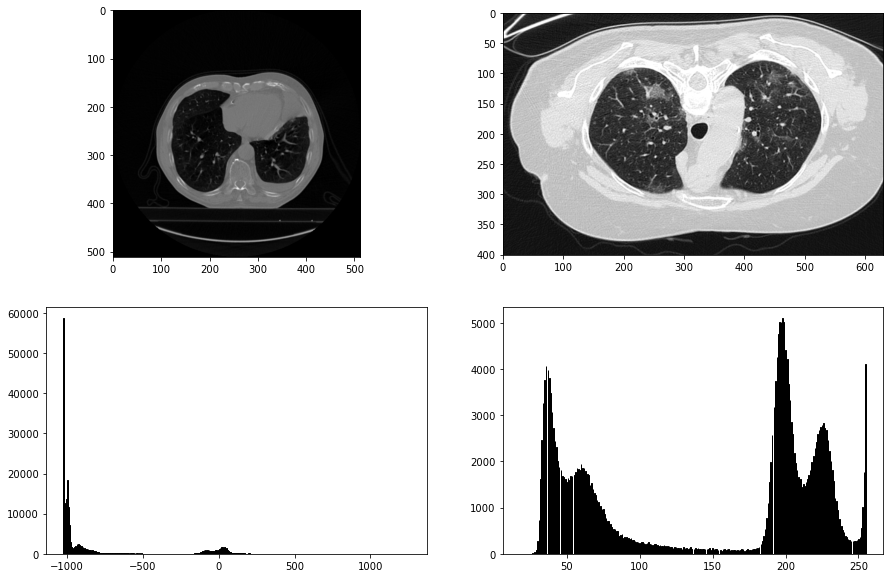

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2,
                        figsize=(15, 10))
for i, img in enumerate([ptr_img, covid_img]):
    axes[0,i].imshow(img, cmap='gray')
    axes[1,i].hist(img.ravel(), bins=500, fc='k', ec='k');

In [4]:
ct_ids = os.listdir("data/raw/COVID-19-CT-Seg_20cases/ct_scans/")
ct_ids = sorted([os.path.basename(ct_id).split(".")[0] for ct_id in ct_ids])
for ct_id in ct_ids:
    covid_ds = Covid19Dataset(ct_dir="data/raw/COVID-19-CT-Seg_20cases/ct_scans/", 
                              mask_dir="data/raw/COVID-19-CT-Seg_20cases/lung_masks/",
                              ct_ids=[ct_id])
    img = covid_ds[0]['img']
    if img.min() > -500:
        print(f"id: {ct_id}, min={img.min()}, max={img.max()}")

id: radiopaedia_10_85902_1, min=0.0, max=255.0
id: radiopaedia_10_85902_3, min=0.0, max=255.0
id: radiopaedia_14_85914_0, min=16.0, max=255.0
id: radiopaedia_27_86410_0, min=14.0, max=255.0
id: radiopaedia_29_86490_1, min=0.0, max=255.0
id: radiopaedia_29_86491_1, min=0.0, max=255.0
id: radiopaedia_36_86526_0, min=0.0, max=255.0
id: radiopaedia_40_86625_0, min=17.0, max=255.0
id: radiopaedia_4_85506_1, min=0.0, max=255.0
id: radiopaedia_7_85703_0, min=0.0, max=255.0


In [ ]:
len(ct_ids)

In [5]:
"radiopaedia_14_85914_0".find("radiopaedia")

0

In [7]:
ct_ids[0].find("radio")

-1